In [1]:
from cartPole import CartPoleEnv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Agent:
    def __init__(self, params, sigma, env):
        self.params = params
        self.sigma = sigma
        self.state = np.array((0, 0, 0, 0, 0))
        self.env = env
        
    
    def getAction(self):
#         action_prob = np.dot(self.state, (self.params).T)
#         action_prob = action_prob * self.sigma
#         action_prob = np.exp(action_prob)
#         row_sum = action_prob.sum()
#         action_prob[0] /= row_sum
#         action_prob[1] /= row_sum
        z = np.dot(self.state, (self.params).T)
        sig = 1.0/(1.0 + np.exp(-z))
        action_prob = [sig, (1-sig)]
        action = np.random.choice([0, 1], p=action_prob)
        return action
        
    def step(self):
        return self.env.step(self.getAction())
    
    def get_return_over_episode(self):
        
        episode_return = 0
        terminated = False
        self.env.reset()
        
        while(not terminated and episode_return<1000):
            (new_state, reward, terminated, _, _) = self.step()
            episode_return += reward
            self.state = new_state
        
        return episode_return 

In [3]:
def run_trial(params, sigma):
    
    agent = Agent(params, sigma, CartPoleEnv())

    return_sum = 0
    gain_over_episodes = []
    for j in range(30):
        gain = agent.get_return_over_episode()
        return_sum += gain
        gain_over_episodes.append(gain)
    avg_return = return_sum / 30 

    return (avg_return, gain_over_episodes)

In [4]:
def run_trials(sigma):
    params = np.random.normal(0, 1, 5)
    (avg_return_old, _) = run_trial(params, sigma)
    gains = []
    gains.append((1, avg_return_old))
    for i in range(800):
        
        new_params = np.random.multivariate_normal(params, sigma*np.identity(5))
     
        (avg_return_new, _) = run_trial(new_params, sigma)
        
       
        if(avg_return_new >= avg_return_old):
            gains.append((i+2, avg_return_new))
            params = new_params
            avg_return_old = avg_return_new
        

    return (gains, params)

### (I)

In [5]:
gains_and_params = []
for i in range(1, 11):
    test_sigma = i/10
    (g, p) = run_trials(test_sigma)
    gains_and_params.append((g, p))
    print("run_trials done for sigma = {0}".format(test_sigma))
    


run_trials done for sigma = 0.1
run_trials done for sigma = 0.2
run_trials done for sigma = 0.3
run_trials done for sigma = 0.4
run_trials done for sigma = 0.5
run_trials done for sigma = 0.6
run_trials done for sigma = 0.7
run_trials done for sigma = 0.8
run_trials done for sigma = 0.9
run_trials done for sigma = 1.0


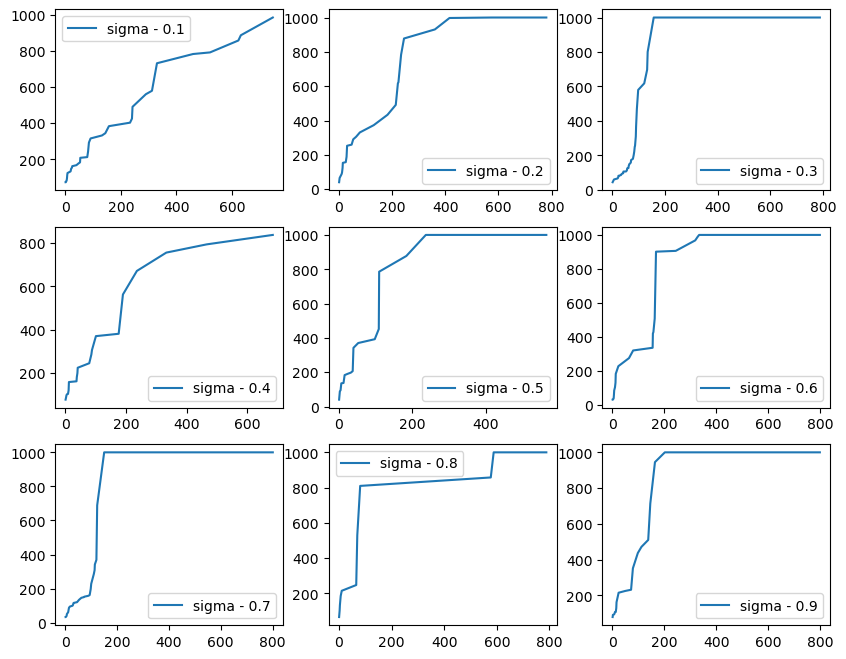

In [6]:
fig, axs = plt.subplots(3, 3, figsize=(10, 8))
axs = axs.flatten()
for i in range(9):
    g = gains_and_params[i][0]
    x = [g[j][0] for j in range(len(g))]
    y = [g[j][1] for j in range(len(g))]
    axs[i].plot(x, y, label=("sigma - "+str((i+1)/10)))
    axs[i].legend()

#### From the above plot, when sigma = 0.9 convergence is the fastest and reward is the highest

In [7]:
def get_averaged_curve(p, sigma, no_of_trials, no_of_episodes, policy=None):
    avg_curve = [0 for i in range(0, no_of_episodes)]
    for i in range(no_of_trials):
        (_, gain_over_episode) = run_trial(p, sigma)
        avg_curve = [sum(x) for x in zip(avg_curve, gain_over_episode)]
    avg_curve = [x/no_of_trials for x in avg_curve]
    return avg_curve


In [10]:
averaged_curve = get_averaged_curve(gains_and_params[8][1], 0.9, 300, 30)

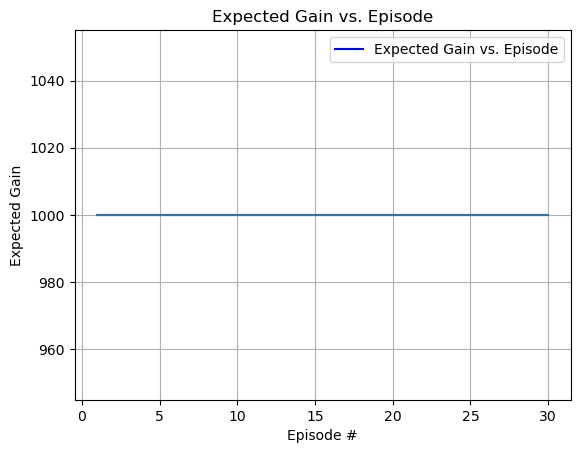

In [11]:
num_trials = 300
std_error = np.std(averaged_curve)/ np.sqrt(num_trials)
plt.plot([i for i in range(1, 31)], averaged_curve, linestyle='-', color='b', label='Expected Gain vs. Episode')
plt.errorbar([i for i in range(1, 31)], averaged_curve,yerr = std_error, ecolor='r')
plt.xlabel('Episode #')
plt.ylabel('Expected Gain')
plt.title('Expected Gain vs. Episode')
plt.legend()  
plt.grid(True)
plt.show()